In [1]:
import pandas as pd
import numpy as np
from PyALE import ale
import joblib
from sklearn.preprocessing import OneHotEncoder

In [3]:
xgb = joblib.load("models/XGBClassifier_ohe_mode_allcat.pkl")
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")
df_ohe = pd.read_csv("data/ohe_mode_allcat.csv")

ohe_col = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp']

/Users/andrewyaholkovsky/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.2.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/andrewyaholkovsky/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator Pipeline from version 1.2.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/andrewyaholkovsky/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.2.0 when using version

In [4]:
df_ohe.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
# df transformation
df['temperature'] = df['temperature'].astype(object)
change_row = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
for i in change_row:
    df[i] = f'{i}_' + df[i].astype(str)

In [6]:
from pyale import hyeni_pyale

PyALE._ALE_generic:INFO: categorical feature detected.


,eff,size,lowerCI_95%,upperCI_95%
coupon,,,,
Coffee House,0.174781,3996,NaN,NaN
Restaurant(<20),-0.005402,2786,-0.014569,0.003766
Carry out & Take away,-0.211812,2393,-0.225048,-0.198577
Restaurant(20-50),-0.105506,1492,-0.122465,-0.088546
Bar,-0.009467,2017,-0.023611,0.004677


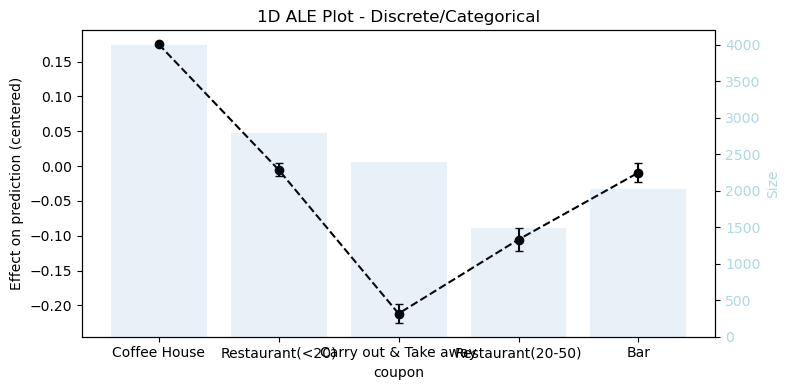

In [7]:
hyeni_pyale(df,df_ohe,xgb,'coupon')

In [8]:
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,CoffeeHouse_never,CarryAway_nan,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,CoffeeHouse_never,CarryAway_nan,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,CoffeeHouse_never,CarryAway_nan,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,CoffeeHouse_never,CarryAway_nan,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,CoffeeHouse_never,CarryAway_nan,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,CoffeeHouse_never,CarryAway_1~3,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,CoffeeHouse_never,CarryAway_1~3,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,CoffeeHouse_never,CarryAway_1~3,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,CoffeeHouse_never,CarryAway_1~3,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,1,1,0,1,0


PyALE._ALE_generic:INFO: categorical feature detected.
PyALE._ALE_generic:INFO: categorical feature detected.
PyALE._ALE_generic:INFO: categorical feature detected.
PyALE._ALE_generic:INFO: categorical feature detected.


Column: temperature no ale plot


PyALE._ALE_generic:INFO: categorical feature detected.
PyALE._ALE_generic:INFO: categorical feature detected.
PyALE._ALE_generic:INFO: categorical feature detected.
PyALE._ALE_generic:INFO: categorical feature detected.
PyALE._ALE_generic:INFO: categorical feature detected.
PyALE._ALE_generic:INFO: categorical feature detected.


Column: has_children no ale plot


PyALE._ALE_generic:INFO: categorical feature detected.
PyALE._ALE_generic:INFO: categorical feature detected.
PyALE._ALE_generic:INFO: categorical feature detected.


Column: car no ale plot
Column: Bar no ale plot


PyALE._ALE_generic:INFO: categorical feature detected.
PyALE._ALE_generic:INFO: categorical feature detected.
PyALE._ALE_generic:INFO: categorical feature detected.


Column: toCoupon_GEQ5min no ale plot
Column: toCoupon_GEQ15min no ale plot
Column: toCoupon_GEQ25min no ale plot
Column: direction_same no ale plot
Column: direction_opp no ale plot
Column: Y no ale plot


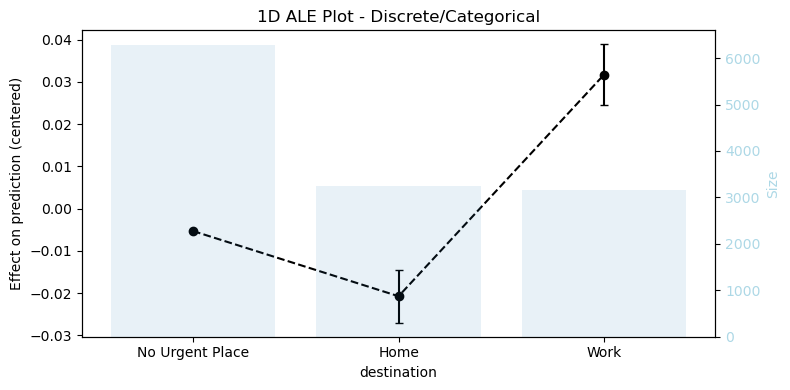

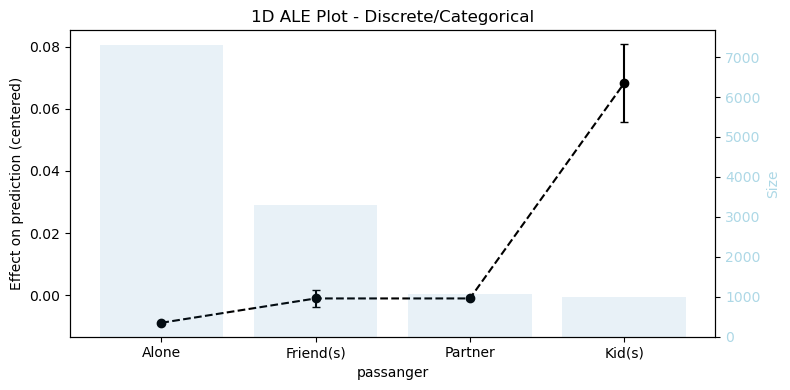

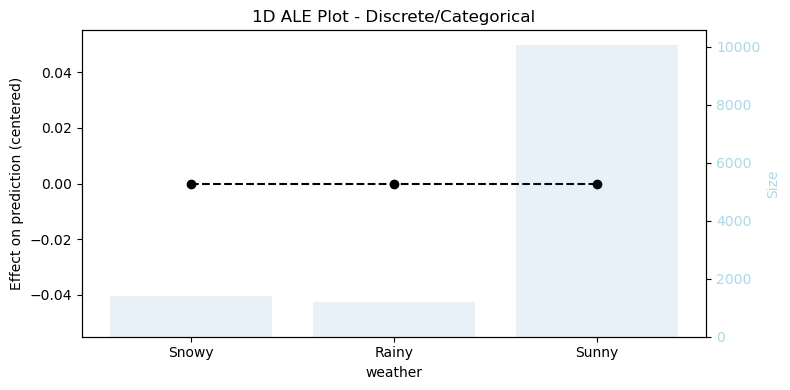

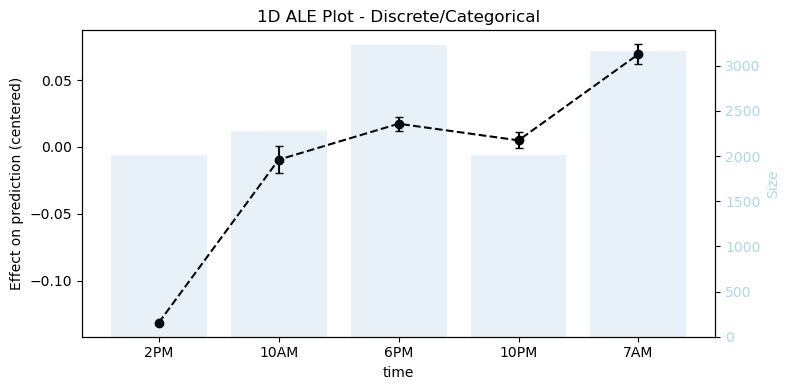

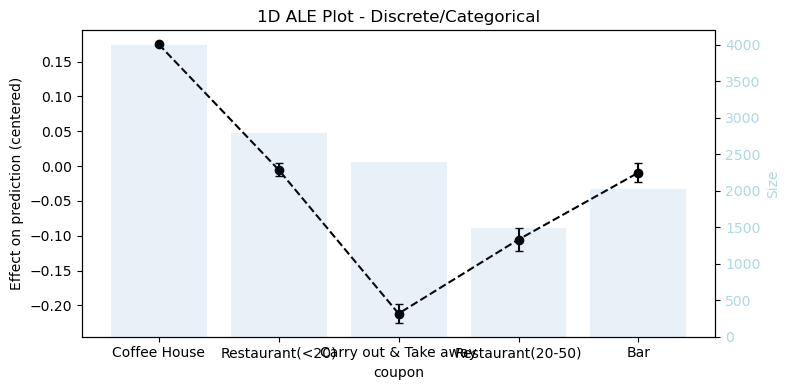

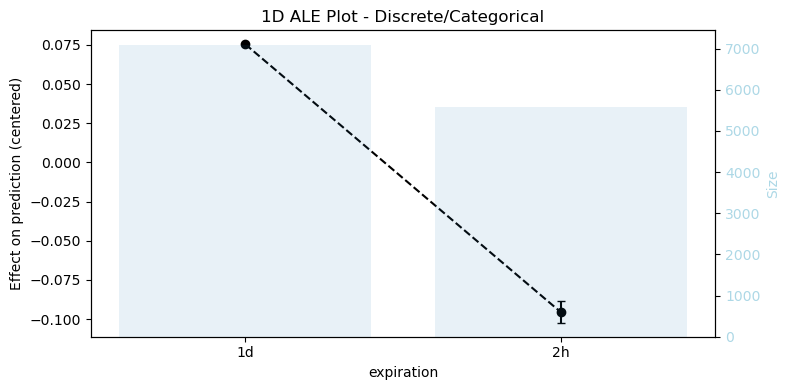

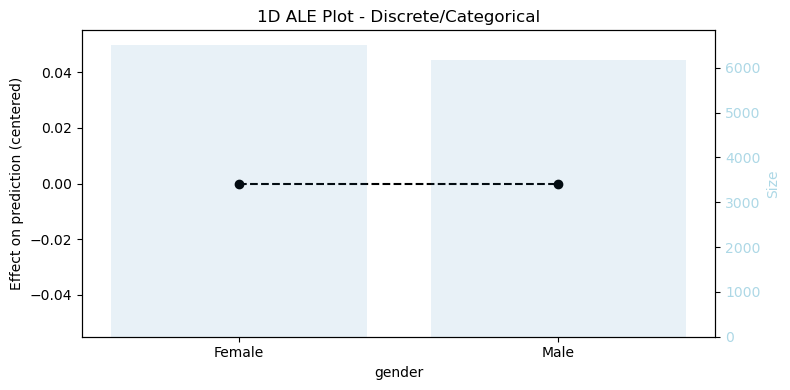

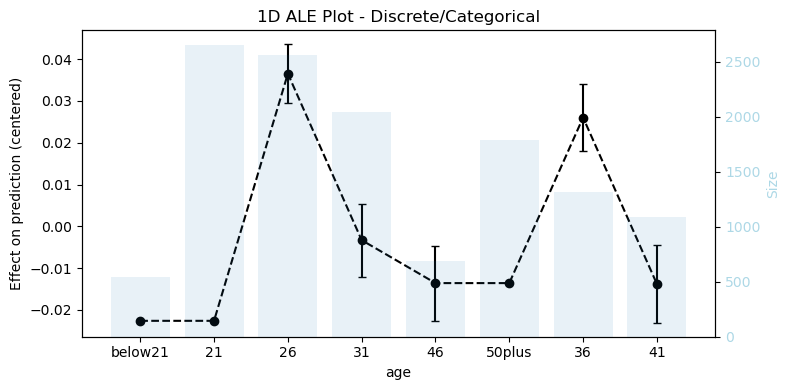

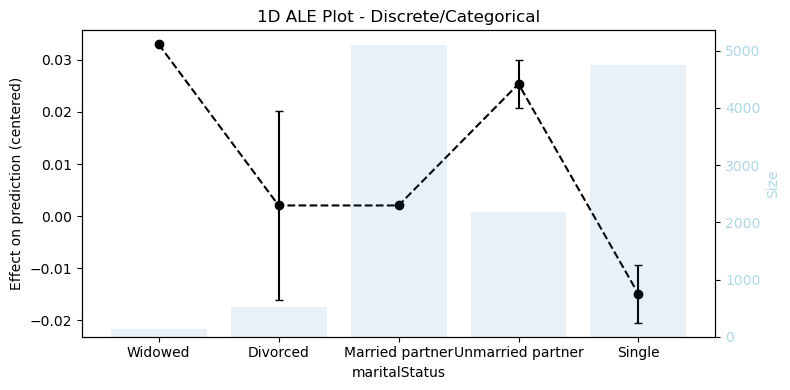

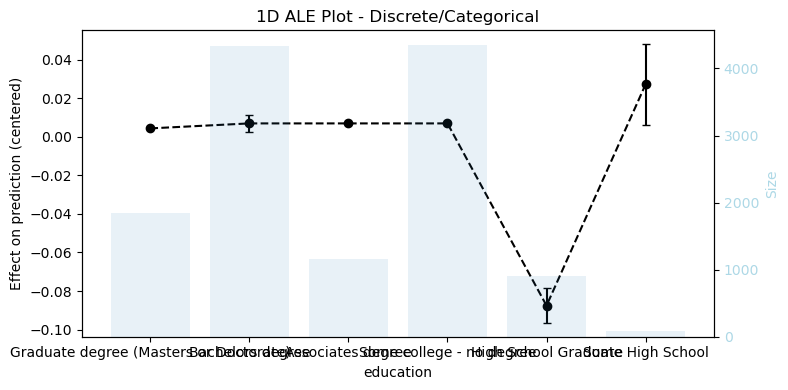

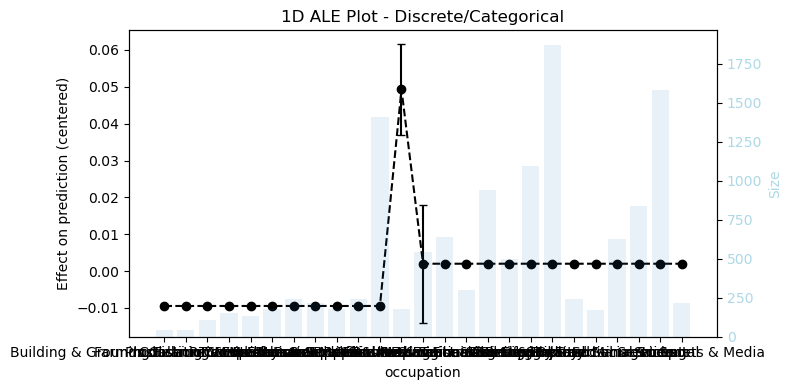

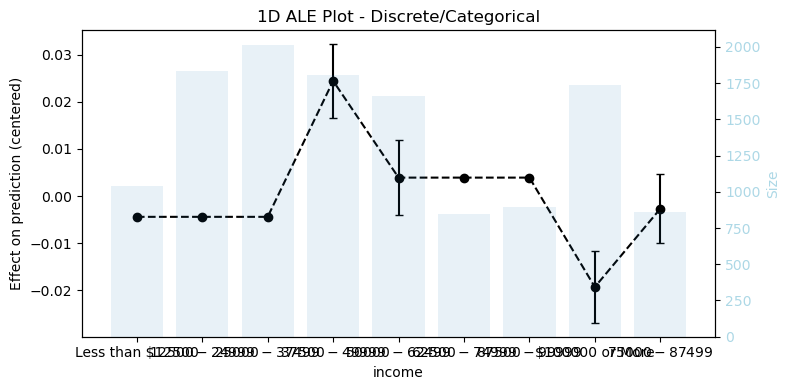

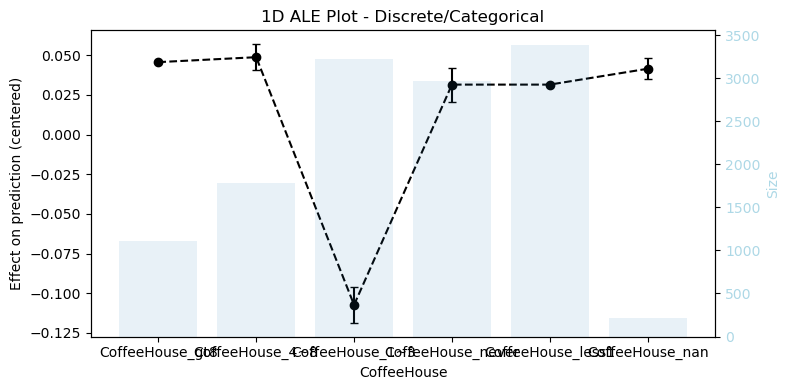

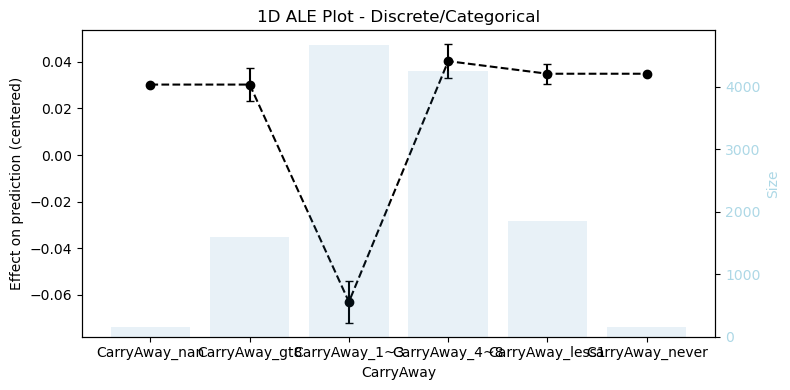

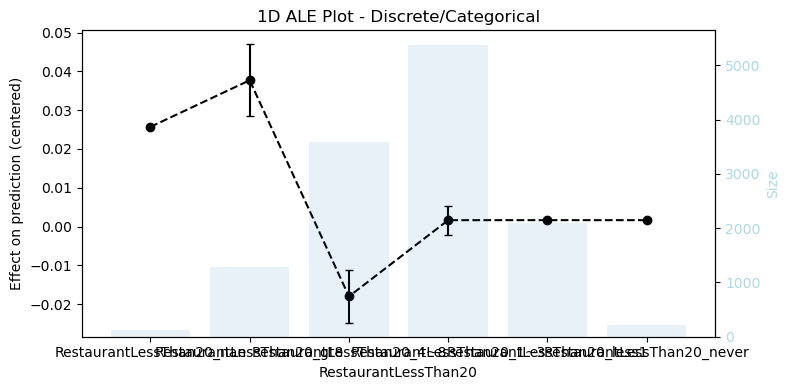

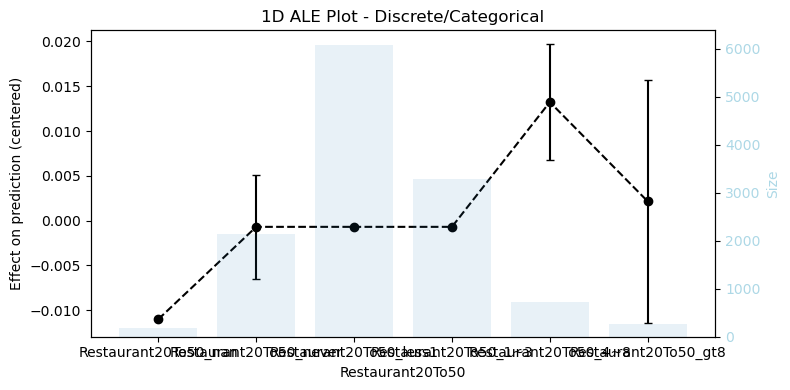

In [21]:
df_columns = df.columns.to_list()

columns_no_aleplot = []

for i in df_columns:
    try:
        hyeni_pyale(df,df_ohe,xgb,i)
    except:
        print("Column:", i, "no ale plot")
        columns_no_aleplot.append(i)

In [22]:
columns_no_aleplot

['temperature',
 'has_children',
 'car',
 'Bar',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Y']

PyALE._ALE_generic:INFO: categorical feature detected.


,eff,size,lowerCI_95%,upperCI_95%
Restaurant20To50,,,,
Restaurant20To50_nan,-0.011028,189,NaN,NaN
Restaurant20To50_never,-0.000705,2136,-0.006535,0.005124
Restaurant20To50_less1,-0.000705,6077,-0.000705,-0.000705
Restaurant20To50_1~3,-0.000705,3290,-0.000705,-0.000705
Restaurant20To50_4~8,0.013232,728,0.006772,0.019692
Restaurant20To50_gt8,0.002143,264,-0.011408,0.015694


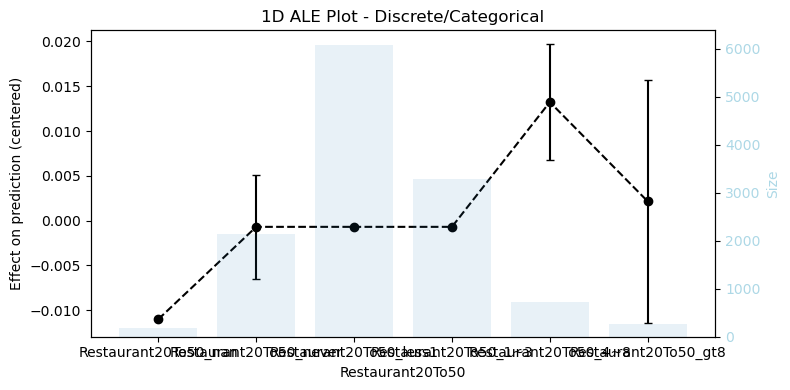

In [17]:
hyeni_pyale(df,df_ohe,xgb,'Restaurant20To50')